# Multiple linear regression, Ridge and Lasso regressions

# Startup_Company Dataset : 
Dataset about 50 companies (startups) and extract from their profit-loss statements: 
how much in this given financial year a company spent for Research&Development, Administration and Marketing, which state 
it works in, and what the Profit is. As a data scientist, we are helping a company to assess where and into which companies
it wants to invest to achieve its goal of maximizing profit. For that purpose, we have to create a model that would tell which
types of companies it should invest in. Here Profit is the main criteria, a dependent variable. For example, our model should
tell that a company should be interesting in startups that operate in New York, have very low Administration Spend and very 
high R&D Spend.Here we will use multiple linear regression, ridge and lasso regressions.

# Import Libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn import linear_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")  #exclude warning messages

# Load Dataset

In [118]:
df=pd.read_csv('E:/sakshi/all subjects of MS/Trimester 6/Predictive Analytics/Assignment 3/50_Startups.csv')

# Top 10 records of dataset

In [4]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Shape(Rows & Columns) of Dataset 

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


(50, 5)

# Statistical Feature of dataset

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


# Check Null Values in Dataset

In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Categorize X and y variables in dataset for multiple Linear Model
Here y is profit(target variable)

In [8]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# EDA of Startup Company Dataset

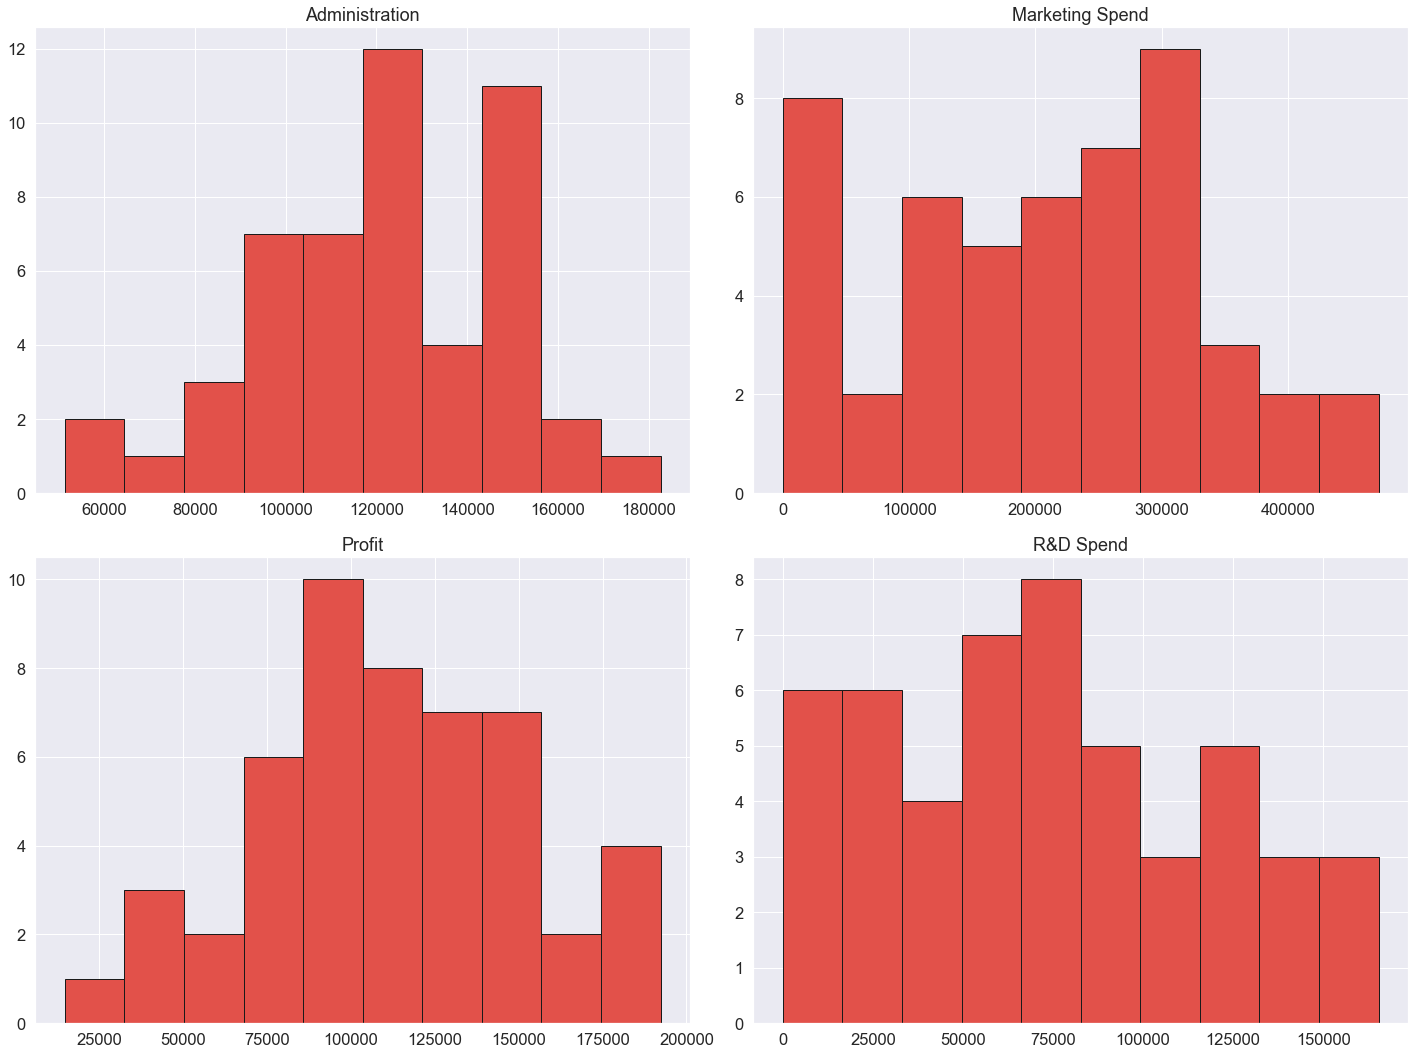

In [119]:
#Histogram of all Variables

df.hist(bins=10, figsize=(20,15), edgecolor='k')
plt.tight_layout()    
plt.show()

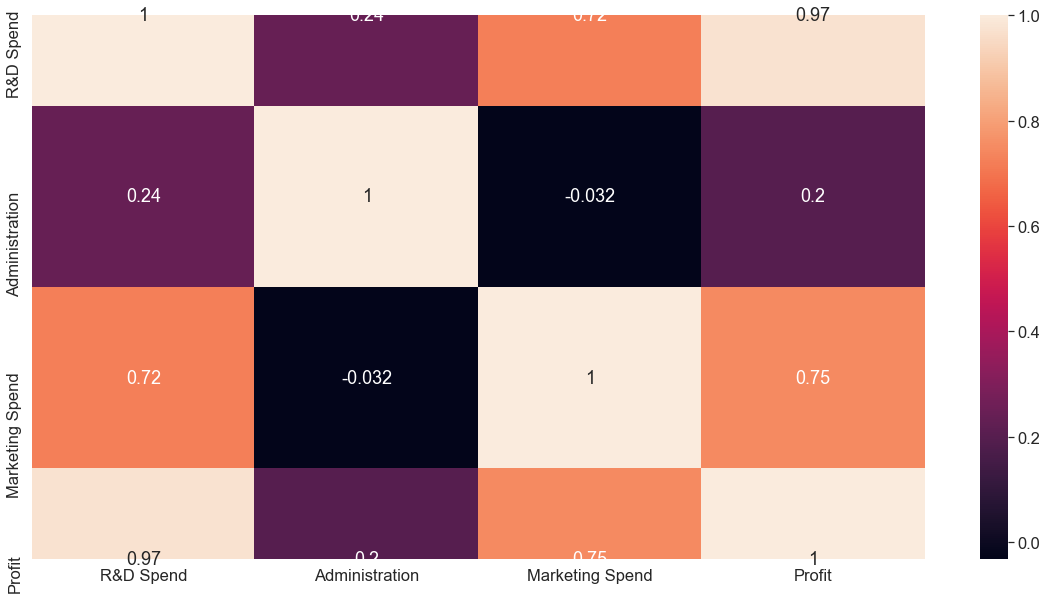

In [120]:
#Correlation Plot of Variables

import seaborn as sns
cor = df.corr()
fig, axe = plt.subplots(figsize=(20,10))
#sns.heatmap(cor,cmap= "YlGnBu",annot=True)
sns.heatmap(cor,annot=True)


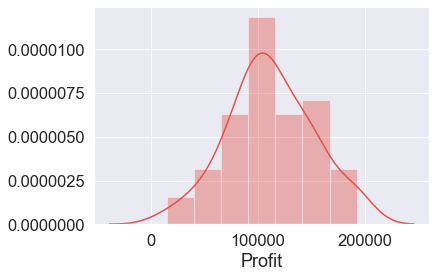

In [127]:
# Target Variable "Profit" Distribution Plot

sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
sns.distplot(df['Profit'])


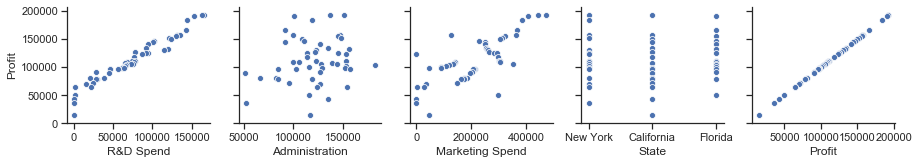

In [128]:
#Scatterplot of "Profit"
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df,kind='scatter',y_vars=['Profit'],x_vars=df.columns[:])

# Encoding categorical data using One Hot Encoder
Here State is Categorical Variable,that's why using one hot encoder for converting it into numerical values (like 0 for newyork and 1 for florida)

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Four assumptions about residuals for the Multiple Regression Model 

Four Error Term ε Assumptions:
• (1) Zero Mean Assumption – Error term ε random variable with mean, E(ε) = 0. For each set of values for
x1, x2, …, xm, mean of y’s lie on regression line.
• (2) Constant Variance Assumption – Variance of ε constant, regardless of value of x1, x2, …, xm.
• (3) Independence Assumption – For any set of values for x1, x2, …, xm, values of ε independent.
• (4) Normality Assumption – Error term ε normally distributed random variable.

# 1) Linearity
Linear regression needs the relationship between the independent and dependent variables to be linear.
Let's use a pair plot to check the relation of independent variables with the Profit variable.

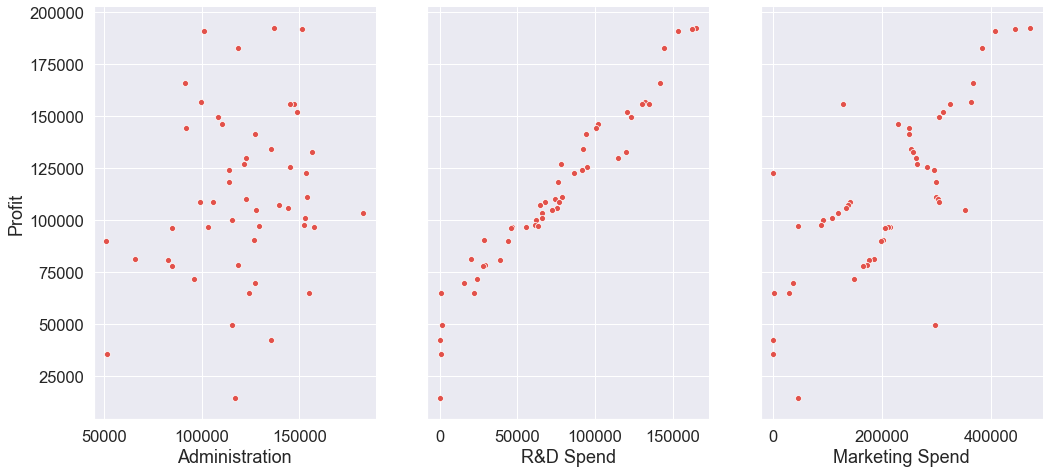

In [37]:
# visualize the relationship between the features and the response variable using scatterplots
p = sns.pairplot(df, x_vars=['Administration','R&D Spend','Marketing Spend'], y_vars='Profit', size=7, aspect=0.7)

By looking at the plots we can see that with the Profit  variable the R&D Spend (the independent variables) form an accurately 
linear shape but Administration and Marketing Spend which seems to hardly have any specific shape. So it shows that
a linear regression fitting might not be the best model for it. A linear explain the data in terms of variability, prediction
accuracy etc.A tip is to remember to always see the plots from where the dependent variable is on the y axis. 
Though it wouldn't vary the shape much but that's how linear regression's intuition is, to put the dependent variable
as y and independents as x(s).

Now rest of the assumptions require us to perform the regression before we can even check for them.
So let's perform regression on it.

In [40]:
x= df.drop(["Profit","State"],axis=1)
y = df.Profit

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [44]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9511460611707223


# 2)  Zero Mean Assumption
Residuals as we know are the differences between the true value and the predicted value. 
One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [79]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.612509525305516e-11


Very close to zero so all good here.

# 3)Regression Assumption

Detecting heteroscedasticity!
Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there 
is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

Text(0, 0.5, 'Standardized Residuals')

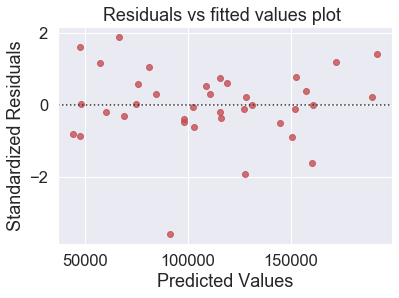

In [76]:

from scipy.stats import zscore
r1 = np.array(residuals)
z_r1 = zscore(residuals)
sort_zr1 = z_r1.sort()
sns.residplot(y_pred, z_r1, color="r")
plt.title('Residuals vs fitted values plot ')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')

# 4) Anderson-Darling test for normality Assumption

In [82]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 2.2754335142015973), ('p-value', 0.0567470191970416)]

Since p value is more than 0.05 in Anderson-Darling Test, we can't reject it's null hypothesis that error terms are
homoscedastic. That's great

# 5) Check for Normality Assumption

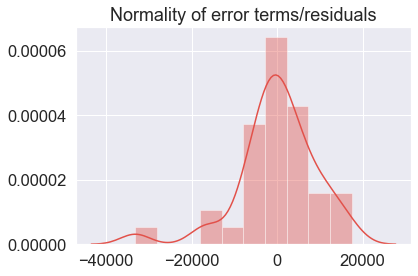

In [53]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

# q-q plot 


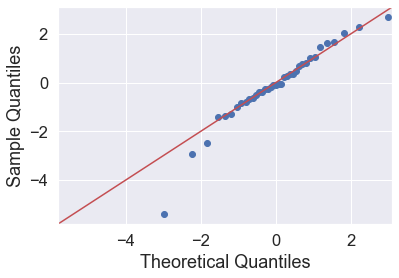

In [78]:
import scipy.stats as stats
fig = sm.qqplot(residuals, stats.t, fit=True, line="45")
plt.show()

# 6) Multicollinearity Assumption Check
Multicollinearity is condition where two or more predictors are correlated.In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

<Figure size 1440x720 with 0 Axes>

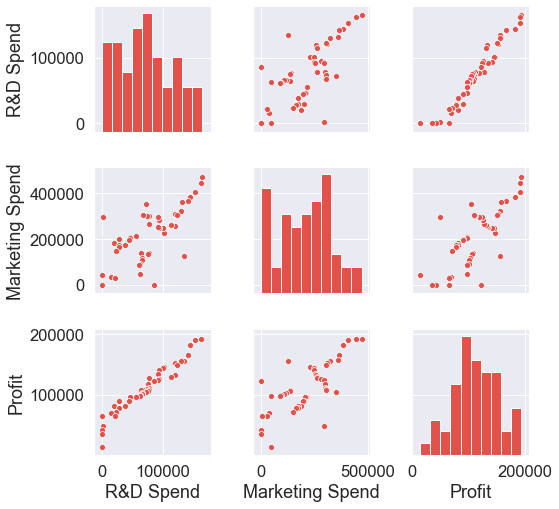

In [129]:
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
plt.figure(figsize=(20,10)) 
sns.pairplot(data = df, vars = ['R&D Spend', 'Marketing Spend', 'Profit'])
plt.show()

# Multiple Linear Regression Model 

In [134]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=0)




#Training the Multiple Linear Regression model on the Training set


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
MSEs=cross_val_score(regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_MSE=np.mean(MSEs)
print(mean_MSE)

-94907103.99328692


In [136]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
print('Predicting the Test set results : ' ,y_pred)

# Real Values 

print('\n Test set results : ' ,y_test)

# Coefficient

print('\n Coefficient : ' ,regressor.coef_)

#Intercept
print('\n Intercept : ' ,regressor.intercept_)

# R2 for training set

print('\nR2 for training set : ',regressor.score(X_train,y_train))

# R2 for test set

print('\nR2 for test set : ',regressor.score(X_test,y_test))


# Mean Square Error


print('\n Mean_absolute_error',metrics.mean_absolute_error(y_test,y_pred))
print('\n Mean_squared_error',metrics.mean_squared_error(y_test,y_pred))
print('\n Squareroot Mean_squared_error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Predicting the Test set results :  [106297.59966882 132926.07997436 134362.77842228  71519.46921658
 180650.71715655 115248.2571595   64939.68480136  99726.11825428
 114940.23331478 169718.80610512  96249.07005881  87336.2065521
 112030.13596157  91975.69916321 128433.62518338 162036.7231283
 152289.76520475]

 Test set results :  28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
Name: Profit, dtype: float64

 Coefficient :  [ 0.00000000e+00 -7.27595761e-12  9.09494702e-13 -7.27595761e-12
  0.00000000e+00  4.66352129e-42  3.64525946e+04  1.58322186e+03
  3.71857230e+03]

 Intercept :  111804.23878651536

R2 for training set :  0.9554422132411944

R2 for test set :  0.9118056192504045

 Mean_absolute_error 7677.781684426057

 Mean_squared_error 83679153.12261571

 Squa

In [137]:
print('Real Vs Predicted Values on Multiple Linear Regression Model:')
d = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
d

Real Vs Predicted Values on Multiple Linear Regression Model:


,Real Values,Predicted Values
28,103282.38,106297.599669
11,144259.40,132926.079974
10,146121.95,134362.778422
41,77798.83,71519.469217
2,191050.39,180650.717157
27,105008.31,115248.257160
38,81229.06,64939.684801
31,97483.56,99726.118254
22,110352.25,114940.233315
4,166187.94,169718.806105


Text(0, 0.5, 'Predicted Values')

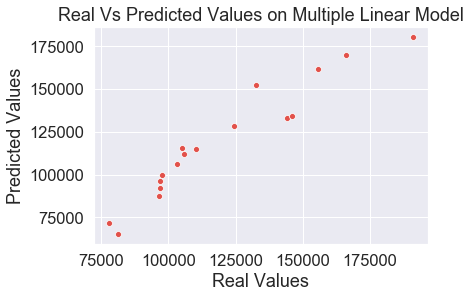

In [138]:
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
sns.scatterplot(y_test,y_pred)
plt.title('Real Vs Predicted Values on Multiple Linear Model')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')

# Ridge Regression

• Ridge regression is very similar to least squares, except that the
coefficients are estimated by minimizing a slightly different quantity.
It minimizes the coefficient estimates where λ ≥ 0 is a tuning
parameter, or regularization. This is the way to prevent overfitting,
reduce the complexity of models etc.

In [139]:
#Ridge Regression
X_train , X_test,y_train,y_test = train_test_split(X,y,random_state=0)
linridge=Ridge(alpha=20.0).fit(X_train,y_train)

print('Startup Company Dataset')
print('Ridge Regression Linear Model Intercept:   {}'.format(linridge.intercept_))
print('Ridge Regression Linear Model Coefficient:  {}'.format(linridge.coef_))
print('R-Squared Score (Training):  {:.3f}'.format(linridge.score(X_train,y_train)))
print('R-Squared Score (Test):   {:.3f}'.format(linridge.score(X_test,y_test)))
print('No. of non-zero features:    {} '.format(np.sum(linridge.coef_ !=0)))

Startup Company Dataset
Ridge Regression Linear Model Intercept:   110893.14121732033
Ridge Regression Linear Model Coefficient:  [    0.             0.             0.             0.
     0.             0.         20410.10761438  3815.6104027
  9960.13062748]
R-Squared Score (Training):  0.878
R-Squared Score (Test):   0.808
No. of non-zero features:    3 


# Ridge Regression with MinMaxScaler (Scaled Data)

In [140]:

scaler=MinMaxScaler()
X_train , X_test,y_train,y_test = train_test_split(X,y,random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

linridge=Ridge(alpha=20.0).fit(X_train_scaled,y_train)

print('Startup Company Dataset')
print('\nRidge Regression Linear Model Intercept:   {}'.format(linridge.intercept_))
print('\nRidge Regression Linear Model Coefficient:  {}'.format(linridge.coef_))
print('\nR-Squared Score (Training):  {:.3f}'.format(linridge.score(X_train_scaled,y_train)))
print('\nR-Squared Score (Test):   {:.3f}'.format(linridge.score(X_test_scaled,y_test)))
print('\nNo. of non-zero features:    {} '.format(np.sum(linridge.coef_ !=0)))



Startup Company Dataset

Ridge Regression Linear Model Intercept:   93906.13304551037

Ridge Regression Linear Model Coefficient:  [    0.             0.             0.             0.
     0.             0.         17587.20303952  4797.19928492
 12294.30817766]

R-Squared Score (Training):  0.335

R-Squared Score (Test):   0.326

No. of non-zero features:    3 


# Ridge Regression with Regularization parameter : Alpha

In [141]:
print('Ridge Regression:Effect of Alpha Regularization Parameter \n')


for a in [0, 1, 10, 100, 1000]:
    linridge = Ridge(alpha = a).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled,y_train)
    r2_test = linridge.score(X_test_scaled,y_test)
    num_coeff_bigger=np.sum(abs(linridge.coef_) > 1.0)
    print('\n Alpha = {:.2f}\nnum abs(coeff) > 1.0 : {},\
    r-squared training : {:.2f},    r-squared test: {:.2f} \n' .format(a,num_coeff_bigger,r2_train,r2_test))

Ridge Regression:Effect of Alpha Regularization Parameter 


 Alpha = 0.00
num abs(coeff) > 1.0 : 3,    r-squared training : 0.95,    r-squared test: 0.79 


 Alpha = 1.00
num abs(coeff) > 1.0 : 3,    r-squared training : 0.91,    r-squared test: 0.78 


 Alpha = 10.00
num abs(coeff) > 1.0 : 3,    r-squared training : 0.51,    r-squared test: 0.51 


 Alpha = 100.00
num abs(coeff) > 1.0 : 3,    r-squared training : 0.09,    r-squared test: 0.06 


 Alpha = 1000.00
num abs(coeff) > 1.0 : 3,    r-squared training : 0.01,    r-squared test: -0.03 



# Lasso Regression
As with ridge regression, the lasso shrinks the coefficient estimates
towards zero. However, in the case of the lasso, the L1 penalty has the
effect of forcing some of the coefficient estimates to be exactly equal to
zero when the tuning parameter λ is sufficiently large.


# Lasso Regression with MinMaxScaler (Scaled Data)

In [91]:
scaler=MinMaxScaler()
X_train , X_test,y_train,y_test = train_test_split(X,y,random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

linlasso=Lasso(alpha=2.0,max_iter=10000).fit(X_train_scaled,y_train)

print('Startup Company Dataset')
print('\nLasso Regression Linear Model Intercept:   {}'.format(linlasso.intercept_))
print('\nLasso Regression Linear Model Coefficient:  {}'.format(linlasso.coef_))
print('\nR-Squared Score (Training):  {:.3f}'.format(linlasso.score(X_train_scaled,y_train)))
print('\nR-Squared Score (Test):   {:.3f}'.format(linlasso.score(X_test_scaled,y_test)))
print('Features with non-zero weight(sorted by absolute magnitude):')

for e in sorted (list(zip(list(X),linlasso.coef_)),
            key = lambda e: -abs(e[1])):
        if e[1]!= 0:
            print('\t{},{:.3f}'.format(e[0],e[1]))


Startup Company Dataset

Lasso Regression Linear Model Intercept:   43421.51021709562

Lasso Regression Linear Model Coefficient:  [129405.41203252   4750.1699761   15439.29956841]

R-Squared Score (Training):  0.951

R-Squared Score (Test):   0.790
Features with non-zero weight(sorted by absolute magnitude):
	[2.01641149 0.56075291 2.15394309],129405.412
	[ 1.75436374 -0.72825703  1.62652767],15439.300
	[1.95586034 1.08280658 1.9236004 ],4750.170


# Lasso Regression with Regularization Parameter : Alpha

In [327]:
print('Ridge Regression:Effect of Alpha Regularization Parameter \n\
parameter on number of features kept in final model\n')


for a in [0.5, 1,2,3,5,10,20,50]:
    linlasso = Lasso(alpha = a,max_iter=10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled,y_train)
    r2_test = linlasso.score(X_test_scaled,y_test)
    num_coeff=np.sum(linlasso.coef_!=0)
    print('\n Alpha = {:.2f}\nFeatures Kept : {},\
    r-squared training : {:.2f},    r-squared test: {:.2f} \n' .format(a,num_coeff,r2_train,r2_test))

Ridge Regression:Effect of Alpha Regularization Parameter 
parameter on number of features kept in final model


 Alpha = 0.50
Features Kept : 5,    r-squared training : 0.95,    r-squared test: 0.79 


 Alpha = 1.00
Features Kept : 5,    r-squared training : 0.95,    r-squared test: 0.79 


 Alpha = 2.00
Features Kept : 5,    r-squared training : 0.95,    r-squared test: 0.79 


 Alpha = 3.00
Features Kept : 5,    r-squared training : 0.95,    r-squared test: 0.79 


 Alpha = 5.00
Features Kept : 4,    r-squared training : 0.95,    r-squared test: 0.79 


 Alpha = 10.00
Features Kept : 4,    r-squared training : 0.95,    r-squared test: 0.79 


 Alpha = 20.00
Features Kept : 4,    r-squared training : 0.95,    r-squared test: 0.79 


 Alpha = 50.00
Features Kept : 4,    r-squared training : 0.95,    r-squared test: 0.80 



# Conclusion :

The Startup company dataset is clean data since although not have any null value in this dataset.Dataset have 5 columns and 50
rows.One of the column is categorical Variable which is State that's why I have used One hot encoder for converting State 
column into numeric values.We did Multiple Regression Model on this dataset after that I did Ridge and Lasso regression.In 
multiple regression R squared for training set is 0.9503901128402915 which is very good and R2 for test set is  0.9318560360727115.
Ridge regression is very similar to least squares, except that the coefficients are estimated by minimizing a slightly different quantity. 
It minimizes the coefficient estimates where λ ≥ 0 is a tuning parameter, or regularization. This is the way to prevent overfitting, reduce the complexity of models etc.
In Lasso Regression , the lasso shrinks the coefficient estimates towards zero. However, in the case of the lasso, the L1 penalty has the
effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter λ is sufficiently large.
In last we can say that profit which is nicely correlated from R&D spend like if we will spend more money on R&D Department then our profit will 
increase. 
